# Monte Carlo Simulation for Option Pricing

FloatText(value=100.0, description='initial price ')

FloatText(value=100.0, description='strike price ')

FloatText(value=1.0, description='time to maturity ')

FloatText(value=0.05, description='risk-free rate ')

FloatText(value=0.2, description='volatility ')

IntText(value=100, description='time steps ')

IntText(value=1000, description='simulations ')

Dropdown(description='option type ', options=('call', 'put'), value='call')

Button(description='start simulation', style=ButtonStyle())

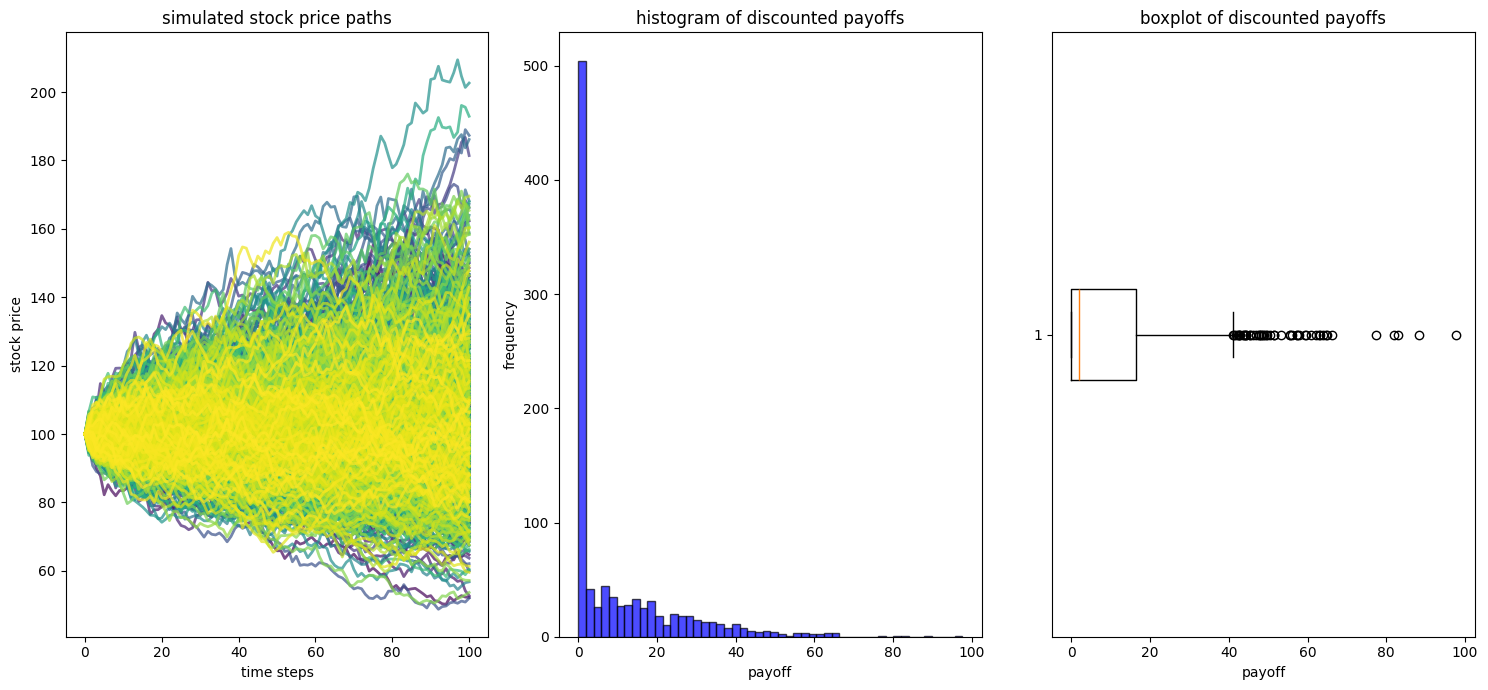

We should outline that the estimated call option price is 10.25. we could state that the standard deviation of the discounted payoffs is 15.09, indicating the variability in the simulation outcomes. The 95% would be a confidence interval for the estimated option price is (9.31, 11.18)This interval means that we are 95% confident that the true option price lies within this range.

Analysis
we can say that estimated price of the call option suggests that it has a value of 10.25 based on the current market conditions.
additionally, the high standard deviation of 15.09 indicates significant variability in the simulation outcomes, reflecting uncertainty in the market.
to add up, 95% confidence interval ranges from 9.31 to 11.18, providing a range within which the true option price is likely to fall.
because, in that case, the estimated option price is lower than the strike price, therefore it would suggests that buying the option might not be profitable unless market conditions improve.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import ipywidgets as widgets
from IPython.display import display, clear_output

def monte_carlo_option_pricer_advanced(S0, K, T, r, sigma, n, m, option_type='call'): #we are a function to price a europian option by using Monte Carlo Simulation
    if option_type not in ['call', 'put']:     #we are validating the option type in order  to ensure it is either call or put one
        raise ValueError("option_type must be 'call' or 'put'")
    
    dt = T / n     #we are calculating the time increment for each time step in the simulation
    
    price_paths = np.zeros((m, n + 1)) #we initialize a matrix to store the simulated price paths, after that rows correspond to different simulation paths and then columns correspond to different time steps
    
    price_paths[:, 0] = S0     #we are setting the initial stock price for all simulations (first column of our matrix)

    for t in range(1, n + 1):  #we are able to simulate the stock price paths using Geometric Brownian Motion
        z = np.random.standard_normal(m)  #we are generating random standard normal variables for the simulations
        #you can see below how we calculate the stock price at the next time step using the Geometric Brownian Motion model while taking into account the drift (r - 0.5 * sigma^2) and the volatility (sigma * sqrt(dt) * z)
        price_paths[:, t] = price_paths[:, t-1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)

    if option_type == 'call':     #we are calculating the payoff at maturity for call and put options
        payoffs = np.maximum(price_paths[:, -1] - K, 0)  #we set the payoff is max(S_T - K, 0) for the call option
    else:
        payoffs = np.maximum(K - price_paths[:, -1], 0) #we set the the payoff is max(K - S_T, 0) for the put option
    
    discounted_payoffs = np.exp(-r * T) * payoffs  #we are discounting the payoffs back to the present value using the risk-free rate
    
    option_price = np.mean(discounted_payoffs)     #we are calculating the estimated option price as the mean of discounted payoffs
    
    std_dev = np.std(discounted_payoffs)     #we are calculating the standard deviation of the discounted payoffs
    
    conf_interval = norm.interval(0.95, loc=option_price, scale=std_dev/np.sqrt(m))    #we are calculating the 95% confidence interval for the option price

    plt.figure(figsize=(15, 7))     #we are plotting the results

    plt.subplot(1, 3, 1)     #we plot each simulated stock price path with a different color
    cmap = plt.get_cmap('viridis', m)
    for i in range(m):
        plt.plot(price_paths[i], color=cmap(i), alpha=0.7, linewidth=2)
    plt.title('simulated stock price paths')
    plt.xlabel('time steps')
    plt.ylabel('stock price')

    plt.subplot(1, 3, 2)     #we plot the histogram of the discounted payoffs
    plt.hist(discounted_payoffs, bins=50, edgecolor='black', color='blue', alpha=0.7)
    plt.title('histogram of discounted payoffs')
    plt.xlabel('payoff')
    plt.ylabel('frequency')

    plt.subplot(1, 3, 3)     #we plot the boxplot of the discounted payoffs
    plt.boxplot(discounted_payoffs, vert=False)
    plt.title('boxplot of discounted payoffs')
    plt.xlabel('payoff')

    plt.tight_layout()  #adjust layout to prevent overlap of plots
    plt.show()

    summary = generate_summary(option_price, std_dev, conf_interval, option_type)    #we generate and print a summary of the simulation results
    analysis = analyze_results(option_price, std_dev, conf_interval, option_type, K)    #here you how we implemented the analysis of the results and provide suggestions
    print(summary)
    print("\nAnalysis")
    print(analysis)
    
    return option_price, std_dev, conf_interval     #we are returning the estimated option price, standard deviation, and confidence interval

def generate_summary(option_price, std_dev, conf_interval, option_type): #here you can see a function to generate a summary based on the simulation outcomes
    summary = (     #we are creating a summary string that describes the results of the simulation
        f"We should outline that the estimated {option_type} option price is {option_price:.2f}. "
        f"we could state that the standard deviation of the discounted payoffs is {std_dev:.2f}, indicating the variability in the simulation outcomes. "
        f"The 95% would be a confidence interval for the estimated option price is ({conf_interval[0]:.2f}, {conf_interval[1]:.2f})"
        "This interval means that we are 95% confident that the true option price lies within this range."
    )
    return summary

def analyze_results(option_price, std_dev, conf_interval, option_type, K): #here you can see a function to analyze the results and provide suggestions
    analysis = (     #we are creating an analysis string that describes the results and provides suggestions
        f"we can say that estimated price of the {option_type} option suggests that it has a value of {option_price:.2f} based on the current market conditions.\n"
        f"additionally, the high standard deviation of {std_dev:.2f} indicates significant variability in the simulation outcomes, reflecting uncertainty in the market.\n"
        f"to add up, 95% confidence interval ranges from {conf_interval[0]:.2f} to {conf_interval[1]:.2f}, providing a range within which the true option price is likely to fall.\n"
    )
    if option_price > K:     #we are adding suggestions based on the analysis of the option price compared to the strike price
        suggestion = (
            "because the estimated option price is higher than the strike price, "
            "therefore it would suggests that buying the option could be profitable if the market conditions remain the same or improve. "
        )
    else:
        suggestion = (
            "because, in that case, the estimated option price is lower than the strike price, "
            "therefore it would suggests that buying the option might not be profitable unless market conditions improve."
        )

    analysis += suggestion
    return analysis

def interactive_pricer(): #here you can see a function to create an interactive user interface for the option pricer
    #below you can see how we created input fields for all parameters by using ipywidgets
    S0 = widgets.FloatText(value=100, description='initial price ')    #there is an initial stock price
    K = widgets.FloatText(value=100, description='strike price ')      #there is an strike price
    T = widgets.FloatText(value=1, description='time to maturity ')    #there is an time to maturity (in years)
    r = widgets.FloatText(value=0.05, description='risk-free rate ')   #there is an risk-free interest rate
    sigma = widgets.FloatText(value=0.2, description='volatility ')    #there is an volatility of the stock
    n = widgets.IntText(value=100, description='time steps ')          #there is an number of time steps
    m = widgets.IntText(value=10000, description='simulations ')       #there is an number of simulations
    option_type = widgets.Dropdown(options=['call', 'put'], value='call', description='option type ')  #there is an option type
    button = widgets.Button(description='start simulation')              #there is an button to Start simulation

    def on_button_click(b):     #we are defining the function to handle button click events
        print("simulation started")  #we confirm that button has been clicked
        
        clear_output(wait=True)  #we are clearing previous output
        
        display(S0, K, T, r, sigma, n, m, option_type, button)    #we are displaying the input fields and button again
        
        monte_carlo_option_pricer_advanced(S0.value, K.value, T.value, r.value, sigma.value, n.value, m.value, option_type.value)    #we are calling the option pricer function with the input values

    button.on_click(on_button_click)  #we are linking the button click event to the handler function
    
    display(S0, K, T, r, sigma, n, m, option_type, button)     #we are displauing the input fields and button

interactive_pricer() #we are caliing the function to create the interactive user interface


## References
https://www.youtube.com/watch?v=pR32aii3shk

https://www.youtube.com/watch?v=6-dhdMDiYWQ

https://www.youtube.com/watch?v=Bi4HMe3-VV4
